# KMeans clustering example

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from time import time
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets.samples_generator import make_blobs

In [2]:
%matplotlib inline

### Dataset generation

* Two features
* 5k samples
* 5 blobs

In [3]:
np.random.seed(0)

batch_size = 45
centers = [[0.3, 10.4], [0.4, 10.3], [0.5, 10.2], [0.6, 10.1], [0.7, 10]]
n_clusters = len(centers)
X, labels_true = make_blobs(n_samples=5000, centers=centers, cluster_std=0.05)

### Cluster fitting with KMeans

* 5 clusters

In [4]:
k_means = KMeans(init='k-means++', n_clusters=5, n_init=10)
t0 = time()
k_means.fit(X)
t_batch = time() - t0
k_means_labels = k_means.labels_
k_means_cluster_centers = k_means.cluster_centers_
k_means_labels_unique = np.unique(k_means_labels)

### Plotting results

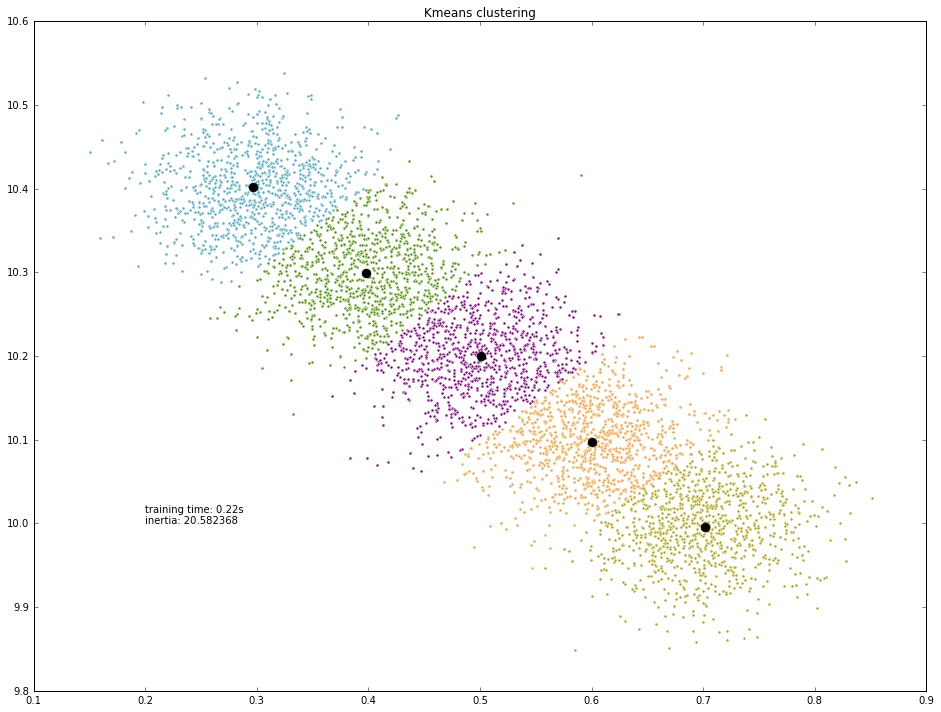

In [5]:
fig = plt.figure(figsize=(16, 12))

colors = ['#4EACC5', '#FF9C34', '#4E9A06', '#b1a50e', '#8b008b']

# KMeans
for k, col in zip(range(n_clusters), colors):
    my_members = k_means_labels == k
    cluster_center = k_means_cluster_centers[k]
    plt.plot(X[my_members, 0], X[my_members, 1], 'w',
            markerfacecolor=col, marker='.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor='k', markersize=9)

plt.title('Kmeans clustering')
plt.text(0.2, 10,  'training time: %.2fs\ninertia: %f' % (
    t_batch, k_means.inertia_))

### Prediction of new elements

Three new elements:

* [0.31, 10.35]
* [0.41, 10.25]
* [0.6, 10.05]

In [6]:
r1 = k_means.predict(np.array([0.31, 10.35]).reshape(1,-1))
r1

array([0])

In [7]:
r2 = k_means.predict(np.array([0.41, 10.25]).reshape(1,-1))
r2

array([2])

In [8]:
r3 = k_means.predict(np.array([0.6, 10.05]).reshape(1,-1))
r3

array([1])

New plot with the new predictions

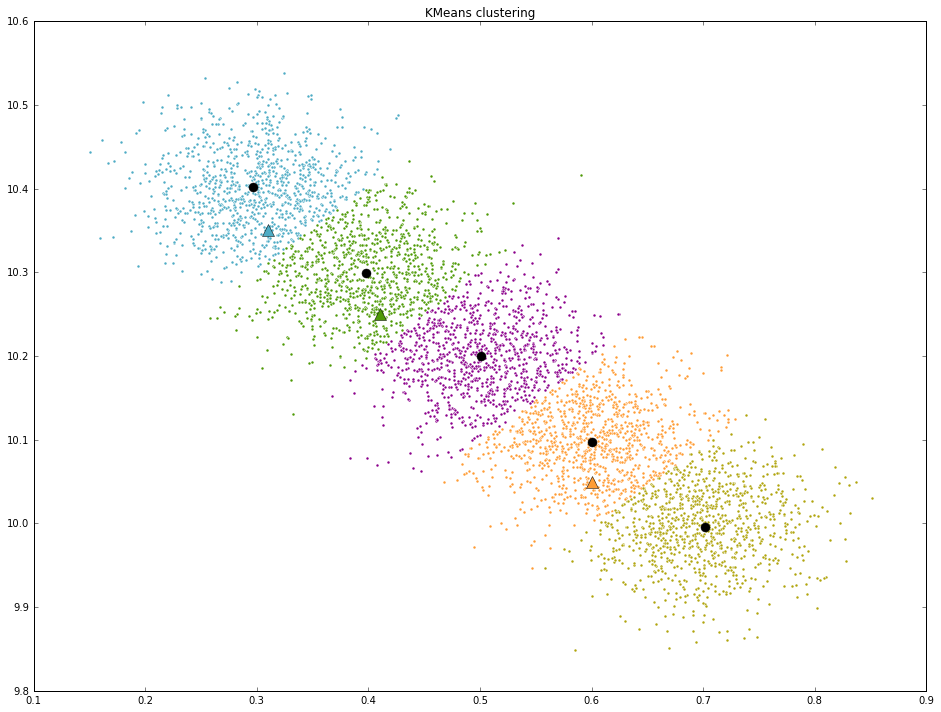

In [9]:
fig = plt.figure(figsize=(16, 12))

colors = ['#4EACC5', '#FF9C34', '#4E9A06', '#b1a50e', '#8b008b']

# KMeans
for k, col in zip(range(n_clusters), colors):
    my_members = k_means_labels == k
    cluster_center = k_means_cluster_centers[k]
    plt.plot(X[my_members, 0], X[my_members, 1], 'w',
            markerfacecolor=col, marker='.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor='k', markersize=9)

plt.title('KMeans clustering')
plt.plot(0.31,10.35,'^', markerfacecolor=str(colors[r1[0]]), markersize=12)
plt.plot(0.41,10.25,'^', markerfacecolor=str(colors[r2[0]]), markersize=12)
plt.plot(0.6,10.05,'^', markerfacecolor=str(colors[r3[0]]), markersize=12)